#Analysis of Violations-2012.csv dataset (Carter Wang)

The first thing I decided to investigate after examining the data was the average response times of each violation category. To do this, I parsed the violation_date and violation_date_closed variables, and noted that there were 116 nulls in violation_date_closed. For this analysis, I simply ignored null entries, although I did look into how the null entries were distributed among violation categories. I then plotted the data into a boxplot, which shows the mean, quartiles, and outliers in a easy to see fashion.

Of note is the one instance where the violation was closed _before_ the violation was opened, which is likely a clerical error, and of the relatively high response time (in days) of chemical hazards and the relatively low reponse time of biohazards. Outside of these two violation types, the dataset was not so large that many conclusions could be drawn.

Next I plotted the violation category counts by month to see that violation complaints peaked in the summer months, such as animals and pets, garbage and refuse, and unsanitary conditions. In contrast, it seems as if the building conditions violations peak later, in the fall. 

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [75]:
df = pd.read_csv('Violations-2012.csv', parse_dates=[3,4])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 6 columns):
violation_id             545 non-null int64
inspection_id            545 non-null int64
violation_category       545 non-null object
violation_date           545 non-null datetime64[ns]
violation_date_closed    429 non-null datetime64[ns]
violation_type           545 non-null object
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 29.8+ KB


In [77]:
set(df.violation_category)

{'Air Pollutants and Odors',
 'Animals and Pests',
 'Biohazards',
 'Building Conditions',
 'Chemical Hazards',
 'Garbage and Refuse',
 'Retail Food',
 'Unsanitary Conditions',
 'Vegetation'}

In [78]:
df['response'] = df[df.violation_date_closed.notnull()].apply(lambda x: (x.violation_date_closed-x.violation_date).days, axis=1)

In [79]:
df.loc[df.response.notnull(), ['violation_category','response']].groupby('violation_category').agg(np.mean)

,response
violation_category,
Air Pollutants and Odors,28.000000
Animals and Pests,41.217391
Biohazards,15.500000
Building Conditions,33.255814
Chemical Hazards,85.562500
Garbage and Refuse,34.735294
Retail Food,34.000000
Unsanitary Conditions,51.846154
Vegetation,40.228070


In [80]:
df[df.response<0]

,violation_id,inspection_id,violation_category,violation_date,violation_date_closed,violation_type,response
99,214351,273183,Building Conditions,2012-05-01,2012-04-17,Mold or Mildew,-14


In [104]:
df.loc[df.violation_date_closed.isnull(),['violation_id','violation_category']].groupby('violation_category').agg(len)

,violation_id
violation_category,
Air Pollutants and Odors,1
Animals and Pests,42
Biohazards,1
Building Conditions,19
Chemical Hazards,1
Garbage and Refuse,24
Unsanitary Conditions,18
Vegetation,10


In [81]:
df[['violation_id','violation_category']].groupby('violation_category').agg(len)

,violation_id
violation_category,
Air Pollutants and Odors,2
Animals and Pests,180
Biohazards,7
Building Conditions,62
Chemical Hazards,17
Garbage and Refuse,126
Retail Food,1
Unsanitary Conditions,83
Vegetation,67


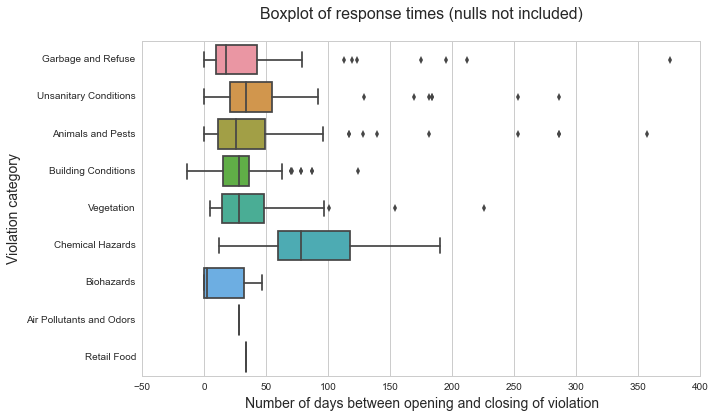

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=[10,6]);
sns.boxplot(x="response", y="violation_category", data=df)
plt.xlabel('Number of days between opening and closing of violation',fontsize=14);
plt.ylabel('Violation category',fontsize=14);
plt.title("Boxplot of response times (nulls not included)",fontsize=16,y=1.05);

In [50]:
df['month'] = df.violation_date.apply(lambda x: x.month)
temp = df[['violation_id','month','violation_category']].groupby(['month','violation_category']).agg(len).unstack(-1).fillna(0)

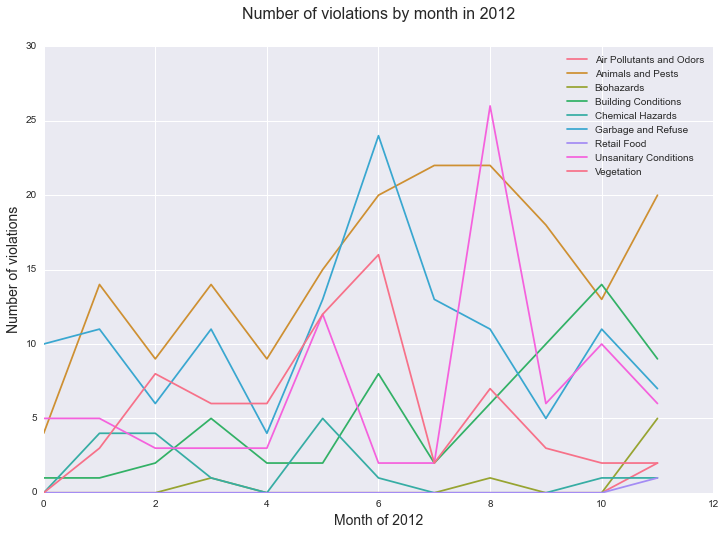

In [102]:
with sns.color_palette("husl", 8):
    sns.set_style("darkgrid")
    plt.figure(figsize=[12,8]);
    for i in temp['violation_id'].columns:
        plt.plot(temp['violation_id'][i])
    plt.legend(temp['violation_id'].columns);
plt.xlabel('Month of 2012',fontsize=14)
plt.ylabel('Number of violations',fontsize=14)
plt.title("Number of violations by month in 2012",fontsize=16,y=1.05);